In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/TAGUR/Desktop/image/archive/Vegetable Images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0001.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0002.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0003.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0004.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0005.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0006.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0007.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0008.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0009.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0010.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0011.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0012.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Images\test\Bean\0013.jpg
C:/Users/TAGUR/Desktop/image/archive/Vegetable Imag

In [4]:
train_path = 'C:/Users/TAGUR/Desktop/image/archive/Vegetable Images/train'
validation_path = 'C:/Users/TAGUR/Desktop/image/archive/Vegetable Images/validation'
test_path = 'C:/Users/TAGUR/Desktop/image/archive/Vegetable Images/test'
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [5]:






class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


In [13]:
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout,Embedding
model = Sequential() # model object
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 87616)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [14]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping)

Epoch 1/10
468/468 [==============================] - 292s 622ms/step - loss: 1.4268 - accuracy: 0.5264 - val_loss: 0.6436 - val_accuracy: 0.7940
Epoch 2/10
468/468 [==============================] - 245s 524ms/step - loss: 0.6060 - accuracy: 0.8050 - val_loss: 0.3627 - val_accuracy: 0.8985
Epoch 3/10
468/468 [==============================] - 412s 880ms/step - loss: 0.3770 - accuracy: 0.8765 - val_loss: 0.2812 - val_accuracy: 0.9096
Epoch 4/10
468/468 [==============================] - 413s 883ms/step - loss: 0.2446 - accuracy: 0.9192 - val_loss: 0.2777 - val_accuracy: 0.9247
Epoch 5/10
468/468 [==============================] - 386s 824ms/step - loss: 0.1987 - accuracy: 0.9378 - val_loss: 0.3070 - val_accuracy: 0.9143
Epoch 6/10
468/468 [==============================] - 353s 754ms/step - loss: 0.1556 - accuracy: 0.9489 - val_loss: 0.3266 - val_accuracy: 0.9177
Epoch 7/10
468/468 [==============================] - 220s 469ms/step - loss: 0.1339 - accuracy: 0.9584 - val_loss: 0.2305 -

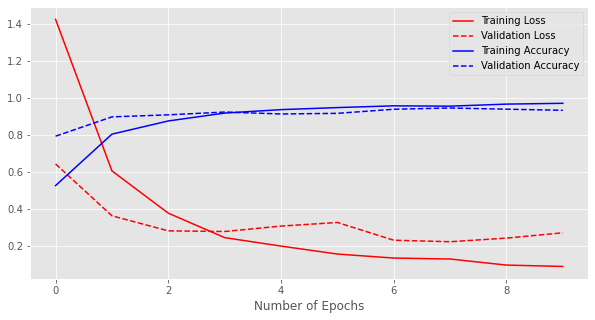

In [30]:
# Plot the error and accuracy
import matplotlib.pyplot as plt
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [31]:
model.evaluate(test_image_generator)

94/94 [==============================] - 9s 99ms/step - loss: 0.2531 - accuracy: 0.9413


[0.25314629077911377, 0.9413333535194397]

1/1 [==============================] - 0s 31ms/step


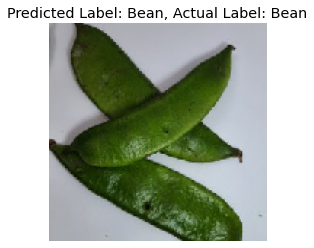

In [37]:
# Generate predictions for external image
external_image_path_2 = "C:/Users/TAGUR/Desktop/image/bean.jpg"
generate_predictions(external_image_path_2, actual_label='Bean')

1/1 [==============================] - 0s 16ms/step


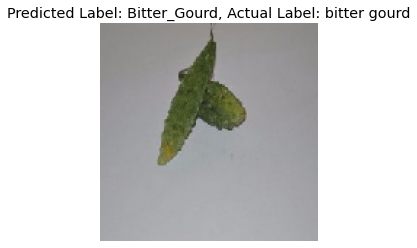

In [38]:
external_image_path_2 = "C:/Users/TAGUR/Desktop/image/bitter.jpg"
generate_predictions(external_image_path_2, actual_label='bitter gourd')

1/1 [==============================] - 0s 35ms/step


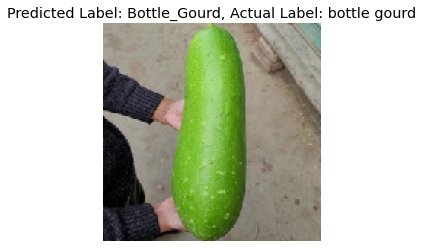

In [39]:
external_image_path_2 = "C:/Users/TAGUR/Desktop/image/bottle-gourd.jpg"
generate_predictions(external_image_path_2, actual_label='bottle gourd')

1/1 [==============================] - 0s 31ms/step


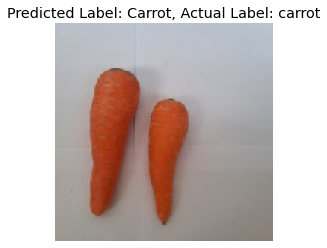

In [40]:
external_image_path_2 = "C:/Users/TAGUR/Desktop/image/carrot-image.jpg"
generate_predictions(external_image_path_2, actual_label='carrot')

1/1 [==============================] - 0s 16ms/step


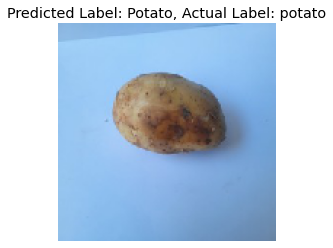

In [41]:
external_image_path_2 = "C:/Users/TAGUR/Desktop/image/potato.image.jpg"
generate_predictions(external_image_path_2, actual_label='potato')